In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

Dataset: https://drive.google.com/drive/folders/1RY4RG7rVfY8-0uGeOPWqWzNIuf-iosuv

Data Dictionary:

RATINGS FILE DESCRIPTION

=========================================================================

All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp

UserIDs range between 1 and 6040

MovieIDs range between 1 and 3952

Ratings are made on a 5-star scale (whole-star ratings only)

Timestamp is represented in seconds

Each user has at least 20 ratings

USERS FILE DESCRIPTION

=========================================================================

User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is not checked for accuracy.
Only users who have provided some demographic information are included in this data set.

Gender is denoted by a "M" for male and "F" for female

Age is chosen from the following ranges:

1: "Under 18"

18: "18-24"

25: "25-34"

35: "35-44"

45: "45-49"

50: "50-55"

56: "56+"

Occupation is chosen from the following choices:

0: "other" or not specified

1: "academic/educator"

2: "artist"

3: "clerical/admin"

4: "college/grad student"

5: "customer service"

6: "doctor/health care"

7: "executive/managerial"

8: "farmer"

9: "homemaker"

10: "K-12 student"

11: "lawyer"

12: "programmer"

13: "retired"

14: "sales/marketing"

15: "scientist"

16: "self-employed"

17: "technician/engineer"

18: "tradesman/craftsman"

19: "unemployed"

20: "writer"

MOVIES FILE DESCRIPTION

=========================================================================

Movie information is in the file "movies.dat" and is in the following format:

MovieID::Title::Genres

Titles are identical to titles provided by the IMDB (including year of release)

Genres are pipe-separated and are selected from the following genres:

Action

Adventure

Animation

Children's

Comedy

Crime

Documentary

Drama

Fantasy

Film-Noir

Horror

Musical

Mystery

Romance

Sci-Fi

Thriller

War

Western

Reading Movie data from Dat file and splitting based on Movie ID::Title::Genres into new columns

In [ ]:
df_movies=pd.read_fwf("zee-movies.dat",encoding='ISO-8859-1')
df_movies[['movieId', 'title','genres']] = df_movies['Movie ID::Title::Genres'].str.split('::', expand=True)
df_movies['genres']=df_movies['genres'].str.split("|")
df_movies.explode('genres')
df_movies.drop(columns=["Unnamed: 1","Unnamed: 2"],inplace=True)
df_movies.drop(columns="Movie ID::Title::Genres",inplace=True)

In [ ]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


Reading user data from Dat file and splitting based on UserID::Gender::Age::Occupation::Zip-code into new columns

In [ ]:
df_users=pd.read_fwf("zee-users.dat",encoding='ISO-8859-1')
df_users[['userId', 'gender','age','occupation','zipcode']] = df_users['UserID::Gender::Age::Occupation::Zip-code'].str.split('::', expand=True)
df_users.drop(columns="UserID::Gender::Age::Occupation::Zip-code",inplace=True)

In [ ]:
df_users.head()

,userId,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
age_group_mapping = {
    '0': "Other or Not Specified",
    '1': "Under 18",
    '18': "18-24",
    '25': "25-34",
    '35': "35-44",
    '45': "45-49",
    '50': "50-55",
    '56': "56+"
}
df_users['age_group'] = df_users['age'].map(age_group_mapping)

In [ ]:
occupation_group_mapping = {
    '0': "Other or Not Specified",
    '1': "Academic/Educator",
    '2': "Artist",
    '3': "Clerical/Admin",
    '4': "College/Grad Student",
    '5': "Customer Service",
    '6': "Doctor/Health Care",
    '7': "Executive/Managerial",
    '8': "Farmer",
    '9': "Homemaker",
    '10': "K-12 Student",
    '11': "Lawyer",
    '12': "Programmer",
    '13': "Retired",
    '14': "Sales/Marketing",
    '15': "Scientist",
    '16': "Self-Employed",
    '17': "Technician/Engineer",
    '18': "Tradesman/Craftsman",
    '19': "Unemployed",
    '20': "Writer"
}

# Create the new 'occupation_group' column
df_users['occupation_group'] = df_users['occupation'].map(occupation_group_mapping).fillna("Other or Not Specified")

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   userId            6040 non-null   object
 1   gender            6040 non-null   object
 2   age               6040 non-null   object
 3   occupation        6040 non-null   object
 4   zipcode           6040 non-null   object
 5   age_group         6040 non-null   object
 6   occupation_group  6040 non-null   object
dtypes: object(7)
memory usage: 330.4+ KB


In [ ]:
#convert age into numeric
df_users['age'] = df_users['age'].astype(int)

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   userId            6040 non-null   object
 1   gender            6040 non-null   object
 2   age               6040 non-null   int64 
 3   occupation        6040 non-null   object
 4   zipcode           6040 non-null   object
 5   age_group         6040 non-null   object
 6   occupation_group  6040 non-null   object
dtypes: int64(1), object(6)
memory usage: 330.4+ KB


In [ ]:
df_users.head(10)

,userId,gender,age,occupation,zipcode,age_group,occupation_group
0,1,F,1,10,48067,Under 18,K-12 Student
1,2,M,56,16,70072,56+,Self-Employed
2,3,M,25,15,55117,25-34,Scientist
3,4,M,45,7,02460,45-49,Executive/Managerial
4,5,M,25,20,55455,25-34,Writer
5,6,F,50,9,55117,50-55,Homemaker
6,7,M,35,1,06810,35-44,Academic/Educator
7,8,M,25,12,11413,25-34,Programmer
8,9,M,25,17,61614,25-34,Technician/Engineer
9,10,F,35,1,95370,35-44,Academic/Educator


Reading rattings data from Dat file and splitting based on UserID::MovieID::Rating::Timestamp into new columns

In [ ]:
df_ratings=pd.read_fwf("zee-ratings.dat",encoding='ISO-8859-1')

In [ ]:
df_ratings.head()

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [ ]:
#code for checking if all the data are homogenious or not
def preproc(m):
  return len(m.split("::"))

In [ ]:
df_ratings["length"]=df_ratings['UserID::MovieID::Rating::Timestamp'].apply(preproc)

In [ ]:
df_ratings["length"].value_counts()

length
4    1000209
Name: count, dtype: int64

In [ ]:
#filtering all the not valid data structure and making it homogenious
df_ratings=df_ratings[df_ratings["length"]==4]

In [ ]:
df_ratings

,UserID::MovieID::Rating::Timestamp,length
0,1::1193::5::978300760,4
1,1::661::3::978302109,4
2,1::914::3::978301968,4
3,1::3408::4::978300275,4
4,1::2355::5::978824291,4
...,...,...
1000204,6040::1091::1::956716541,4
1000205,6040::1094::5::956704887,4
1000206,6040::562::5::956704746,4
1000207,6040::1096::4::956715648,4


In [ ]:
df_ratings[['userId', 'movieId', 'rating','timestamp']] = df_ratings['UserID::MovieID::Rating::Timestamp'].str.split('::', expand=True)
df_ratings.drop(columns=["UserID::MovieID::Rating::Timestamp","length"],inplace=True)

In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
df_ratings.shape

(1000209, 4)

In [ ]:
# not in correct format
df_ratings=df_ratings[df_ratings['rating']!='5:2']

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1000209 non-null  object
 1   movieId    1000209 non-null  object
 2   rating     1000209 non-null  object
 3   timestamp  1000209 non-null  object
dtypes: object(4)
memory usage: 30.5+ MB


In [ ]:
#convert ratings into numeric
df_ratings['rating'] = df_ratings['rating'].astype(int)

In [ ]:
df_ratings['date'] = pd.to_datetime(df_ratings['timestamp'], unit='s',errors='coerce').dt.strftime('%d-%m-%Y')

<ipython-input-27-aff6ab2d649e>:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_ratings['date'] = pd.to_datetime(df_ratings['timestamp'], unit='s',errors='coerce').dt.strftime('%d-%m-%Y')


In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1000209 non-null  object
 1   movieId    1000209 non-null  object
 2   rating     1000209 non-null  int64 
 3   timestamp  1000209 non-null  object
 4   date       1000209 non-null  object
dtypes: int64(1), object(4)
memory usage: 38.2+ MB


In [ ]:
df_ratings.head(10)

,userId,movieId,rating,timestamp,date
0,1,1193,5,978300760,31-12-2000
1,1,661,3,978302109,31-12-2000
2,1,914,3,978301968,31-12-2000
3,1,3408,4,978300275,31-12-2000
4,1,2355,5,978824291,06-01-2001
5,1,1197,3,978302268,31-12-2000
6,1,1287,5,978302039,31-12-2000
7,1,2804,5,978300719,31-12-2000
8,1,594,4,978302268,31-12-2000
9,1,919,4,978301368,31-12-2000


In [ ]:
df_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'date'], dtype='object')

In [ ]:
df_users.shape

(6040, 7)

In [ ]:
df_users.columns

Index(['userId', 'gender', 'age', 'occupation', 'zipcode', 'age_group',
       'occupation_group'],
      dtype='object')

In [ ]:
df_movies.shape

(3883, 3)

In [ ]:
df_movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

Merging all data into single data frame

In [ ]:
merged_df = pd.merge(df_ratings, df_users, on='userId', how='left')

In [ ]:
merged_df = pd.merge(merged_df, df_movies, on='movieId', how='left')

In [ ]:
merged_df.shape

(1000209, 13)

In [ ]:
merged_df.head()

,userId,movieId,rating,timestamp,date,gender,age,occupation,zipcode,age_group,occupation_group,title,genres
0,1,1193,5,978300760,31-12-2000,F,1,10,48067,Under 18,K-12 Student,One Flew Over the Cuckoo's Nest (1975),[Drama]
1,1,661,3,978302109,31-12-2000,F,1,10,48067,Under 18,K-12 Student,James and the Giant Peach (1996),"[Animation, Children's, Musical]"
2,1,914,3,978301968,31-12-2000,F,1,10,48067,Under 18,K-12 Student,My Fair Lady (1964),"[Musical, Romance]"
3,1,3408,4,978300275,31-12-2000,F,1,10,48067,Under 18,K-12 Student,Erin Brockovich (2000),[Drama]
4,1,2355,5,978824291,06-01-2001,F,1,10,48067,Under 18,K-12 Student,"Bug's Life, A (1998)","[Animation, Children's, Comedy]"


In [ ]:
merged_df.shape

(1000209, 13)

In [ ]:
merged_df_final=merged_df.explode('genres')

In [ ]:
merged_df_final.shape

(2064096, 13)

In [ ]:
merged_df_final.head()

,userId,movieId,rating,timestamp,date,gender,age,occupation,zipcode,age_group,occupation_group,title,genres
0,1,1193,5,978300760,31-12-2000,F,1,10,48067,Under 18,K-12 Student,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,31-12-2000,F,1,10,48067,Under 18,K-12 Student,James and the Giant Peach (1996),Animation
1,1,661,3,978302109,31-12-2000,F,1,10,48067,Under 18,K-12 Student,James and the Giant Peach (1996),Children's
1,1,661,3,978302109,31-12-2000,F,1,10,48067,Under 18,K-12 Student,James and the Giant Peach (1996),Musical
2,1,914,3,978301968,31-12-2000,F,1,10,48067,Under 18,K-12 Student,My Fair Lady (1964),Musical


Data Analytics

In [ ]:
#number of unige users
merged_df_final['userId'].nunique()

6040

In [ ]:
#numvber of unique movie
merged_df_final['movieId'].nunique()

3706

In [ ]:
merged_df['gender'].value_counts()

gender
M    753769
F    246440
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='gender'>

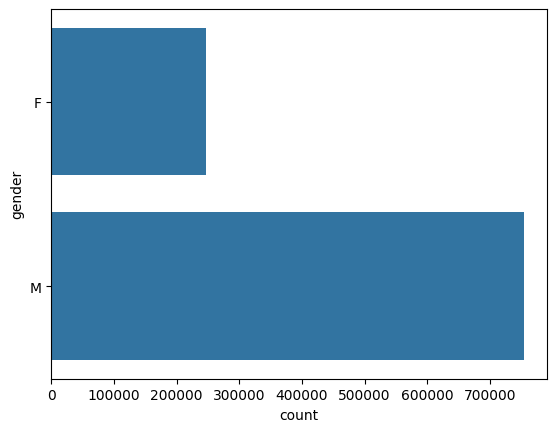

In [ ]:
sns.countplot(merged_df['gender'])

Most of the users in our dataset who’ve rated the movies are Male. (T/F)  True

In [ ]:
merged_df_final['genres'].value_counts()

genres
Comedy      353032
Drama       347846
Action      256574
Thriller    186846
Romance     139843
             ...  
Childr          13
Document        13
Acti             4
Horr             3
Documen          2
Name: count, Length: 63, dtype: int64

Users of which age group have watched and rated the most number of movies?

In [ ]:
# age group 25-34 users have watched highest movies
merged_df['age_group'].value_counts()

age_group
25-34       395556
35-44       199003
18-24       183536
45-49        83633
50-55        72490
56+          38780
Under 18     27211
Name: count, dtype: int64

<Axes: xlabel='age_group'>

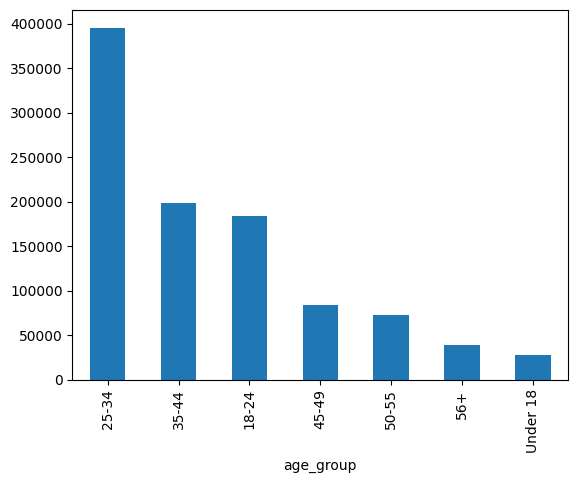

In [ ]:
merged_df['age_group'].value_counts().plot(kind='bar')

In [ ]:
# avg ratings for users aged 56+ is high
merged_df.groupby('age_group')['rating'].mean().sort_values(ascending=False).head(10)

age_group
56+         3.766632
50-55       3.714512
45-49       3.638062
35-44       3.618162
Under 18    3.549520
25-34       3.545235
18-24       3.507573
Name: rating, dtype: float64

<Axes: xlabel='age_group'>

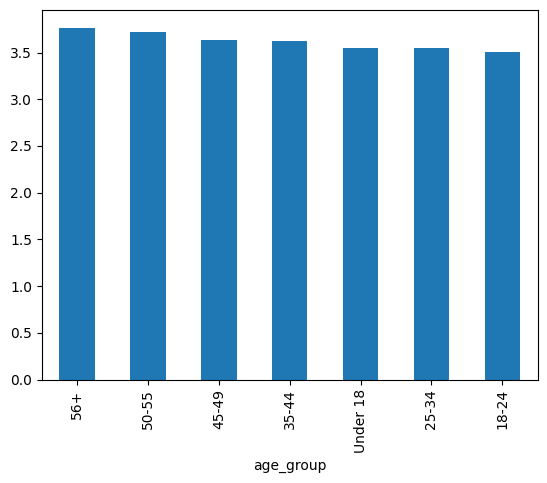

In [ ]:
merged_df.groupby('age_group')['rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

Users belonging to which profession have watched and rated the most movies?

In [ ]:
# occupation group of College/Grad Student have mwatched more movie
merged_df['occupation_group'].value_counts()

occupation_group
College/Grad Student      131032
Other or Not Specified    130499
Executive/Managerial      105425
Academic/Educator          85351
Technician/Engineer        72816
Writer                     60397
Programmer                 57214
Artist                     50068
Sales/Marketing            49109
Self-Employed              46021
Doctor/Health Care         37205
Clerical/Admin             31623
K-12 Student               23290
Scientist                  22951
Customer Service           21850
Lawyer                     20563
Unemployed                 14904
Retired                    13754
Tradesman/Craftsman        12086
Homemaker                  11345
Farmer                      2706
Name: count, dtype: int64

<Axes: xlabel='occupation_group'>

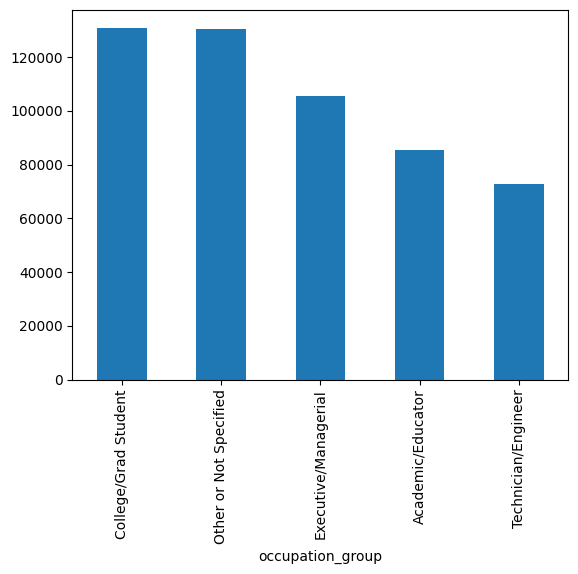

In [ ]:
merged_df['occupation_group'].value_counts().head(5).plot(kind='bar')

In [ ]:
#  occupation group of retired people have rated movie high
merged_df.groupby('occupation_group')['rating'].mean().sort_values(ascending=False).head(10)

occupation_group
Retired                 3.781736
Scientist               3.689774
Doctor/Health Care      3.661578
Homemaker               3.656589
Clerical/Admin          3.656516
Programmer              3.654001
Sales/Marketing         3.618481
Lawyer                  3.617371
Technician/Engineer     3.613574
Executive/Managerial    3.599772
Name: rating, dtype: float64

<Axes: xlabel='occupation_group'>

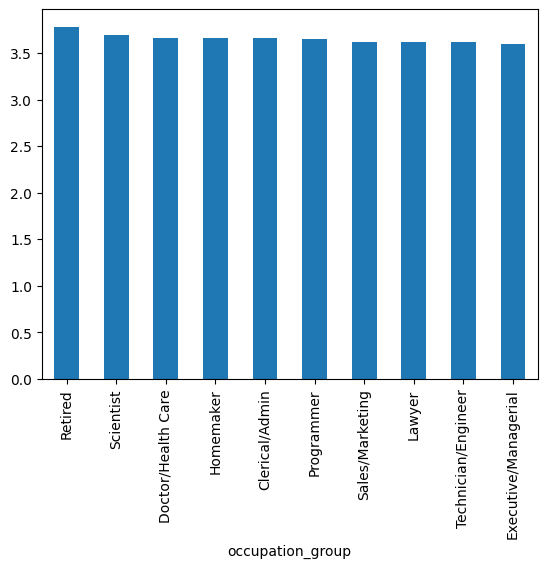

In [ ]:
merged_df.groupby('occupation_group')['rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

In [ ]:
#  occupation group of retired people have rated movie high
merged_df.groupby('gender')['rating'].mean().sort_values(ascending=False).head(10)

gender
F    3.620366
M    3.568879
Name: rating, dtype: float64

In this platform usually people at the age group of 56+ or retired people gave high ratings to movies

In this platform usually people at the age group of 25-34 or students watched more movies

In this platform usually Females gave high ratings to movies

In [ ]:
#nmber of unique catagoery in genre
merged_df_final['genres'].nunique()

63

In [ ]:
merged_df_final['genres'].value_counts()[:10]

genres
Comedy        353032
Drama         347846
Action        256574
Thriller      186846
Romance       139843
Sci-Fi        135860
Adventure     125082
Crime          79387
Horror         75438
Children's     69817
Name: count, dtype: int64

<Axes: xlabel='genres'>

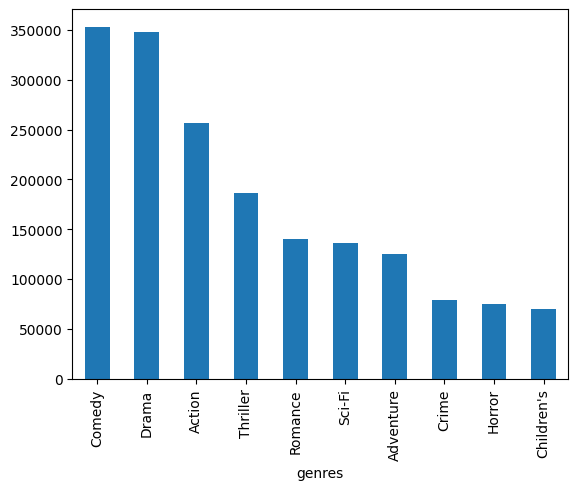

In [ ]:
#top 10 genere
merged_df_final['genres'].value_counts()[:10].plot(kind='bar')

Top 10 moives watched by all users on zee platform

High watch count

In [ ]:
merged_df['title'].value_counts()[0:10]

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: count, dtype: int64

Bottom 10 moives watched by all users on zee platform

Low watch count

In [ ]:
merged_df['title'].value_counts().tail(10)

title
Billy's Holiday (1995)                         1
Baby, The (1973)                               1
Schlafes Bruder (Brother of Sleep) (1995)      1
Windows (1980)                                 1
Beloved/Friend (Amigo/Amado) (1999)            1
Blood and Sand (Sangre y Arena) (1989)         1
Ring, The (1927)                               1
Eden (1997)                                    1
Frank and Ollie (1995)                         1
Five Wives, Three Secretaries and Me (1998)    1
Name: count, dtype: int64

In [ ]:
merged_df.groupby('title')['rating'].mean()

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [ ]:
#top 10 high rated movie
merged_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Ulysses (Ulisse) (1954)                      5.0
Lured (1947)                                 5.0
Follow the Bitch (1998)                      5.0
Bittersweet Motel (2000)                     5.0
Song of Freedom (1936)                       5.0
One Little Indian (1973)                     5.0
Smashing Time (1967)                         5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Gate of Heavenly Peace, The (1995)           5.0
Baby, The (1973)                             5.0
Name: rating, dtype: float64

In [ ]:
#top 10 low rated movie
merged_df.groupby('title')['rating'].mean().sort_values().head(10)

title
Elstree Calling (1930)                                        1.0
Get Over It (1996)                                            1.0
Venice/Venice (1992)                                          1.0
Windows (1980)                                                1.0
Kestrel's Eye (Falkens öga) (1998)                            1.0
McCullochs, The (1975)                                        1.0
Sleepover (1995)                                              1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973)    1.0
Spring Fever USA (a.k.a. Lauderdale) (1989)                   1.0
Santa with Muscles (1996)                                     1.0
Name: rating, dtype: float64

In [ ]:
# most of the people rated 4
merged_df['rating'].value_counts()

rating
4    348971
3    261197
5    226310
2    107557
1     56174
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='Count'>

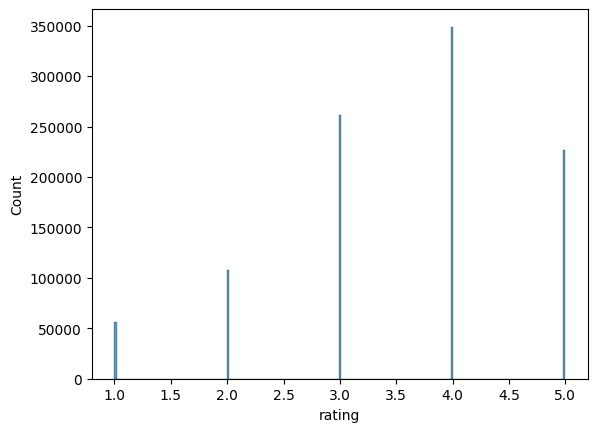

In [ ]:
sns.histplot(merged_df['rating'])

<Axes: xlabel='genres'>

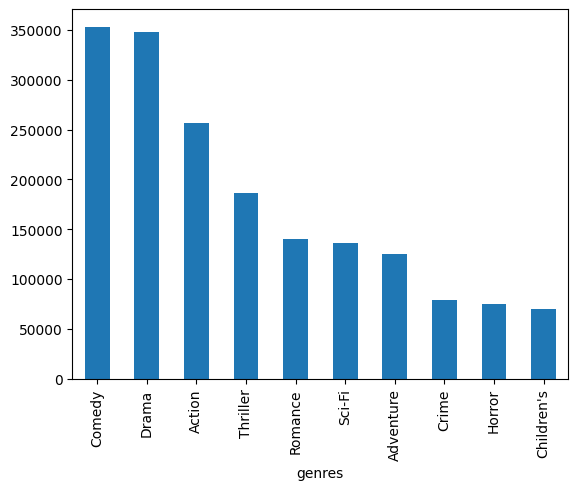

In [ ]:
#top watched generes
merged_df_final['genres'].value_counts().head(10).plot(kind='bar')

In [ ]:
#top 10 Highly rated genews
merged_df_final.groupby('genres')['rating'].mean().sort_values(ascending=False).head(10)

genres
Adv          4.292977
Fantas       4.291834
Roman        4.117241
Docu         4.102473
Dr           4.089980
Documenta    4.081633
Film-Noir    4.075188
Adventu      4.022893
Rom          4.000000
Wa           3.970085
Name: rating, dtype: float64

In [ ]:
#low 10 Highly rated genews
merged_df_final.groupby('genres')['rating'].mean().sort_values(ascending=True).head(10)

genres
Horr       1.666667
Advent     2.051095
Thrille    2.097826
Thri       2.203390
Animati    2.208333
Chi        2.412429
Acti       2.500000
Childre    2.544803
Wester     2.579082
We         2.660550
Name: rating, dtype: float64

In [ ]:
merged_df['date'] = pd.to_datetime(merged_df['date'])



<ipython-input-70-a7f4aafe482d>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['date'] = pd.to_datetime(merged_df['date'])


In [ ]:
#most moives are watched in year 2000
merged_df['date'].dt.year.value_counts()

date
2000    904757
2001     68058
2002     24046
2003      3348
Name: count, dtype: int64

In [ ]:
#most moives are watched in month November
merged_df['date'].dt.strftime('%B').value_counts()

date
November     295459
August       188687
December     118249
July          96990
May           74278
June          61110
September     56789
October       45503
January       23072
April         19407
February      12128
March          8537
Name: count, dtype: int64

<Axes: xlabel='date'>

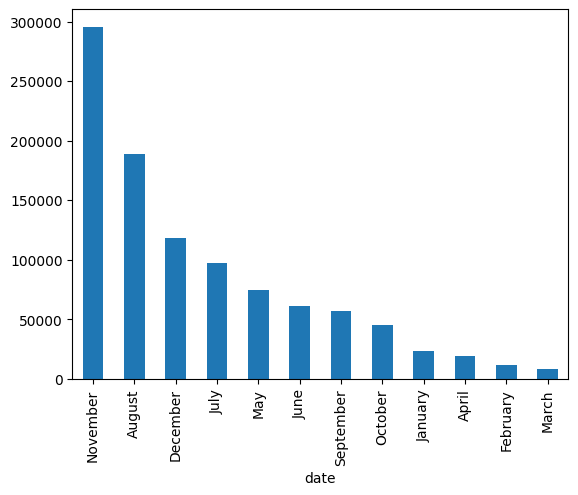

In [ ]:
merged_df['date'].dt.strftime('%B').value_counts().plot(kind='bar')

# Setting Mtrix for Recomender systems

 Recommender System based on Pearson Correlation

In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp,date
0,1,1193,5,978300760,31-12-2000
1,1,661,3,978302109,31-12-2000
2,1,914,3,978301968,31-12-2000
3,1,3408,4,978300275,31-12-2000
4,1,2355,5,978824291,06-01-2001


In [ ]:
df_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'date'], dtype='object')

In [ ]:
# expected number of combination
df_users.shape[0]*df_movies.shape[0]

23453320

In [ ]:
#but we have rattings for
df_ratings.shape[0]

1000209

In [ ]:
#only 5% of the combination has values
df_ratings.shape[0]/(df_users.shape[0]*df_movies.shape[0])*100

4.264679797998748

In [ ]:
user_item_matrix = df_ratings.pivot_table(index='userId', columns='movieId', values='rating', aggfunc='mean').fillna(0)

In [ ]:
#User-Item Matrix
user_item_matrix

movieId,1,10,100,1000,1002,1003,1004,1005,1006,1007,...,99,990,991,992,993,994,996,997,998,999
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
997,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
non_zero_mask = user_item_matrix > 0
non_zero_counts = non_zero_mask.sum().sum()

In [ ]:
# % value of ratings present in the matrix remaining 96% are 0
non_zero_counts/(user_item_matrix.shape[0]*user_item_matrix.shape[1])*100

4.468362562231285

In [ ]:
#Item-Item Corealtion matrix
corr_matrix = user_item_matrix.corr()

In [ ]:
corr_matrix

movieId,1,10,100,1000,1002,1003,1004,1005,1006,1007,...,99,990,991,992,993,994,996,997,998,999
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.215653,0.081016,0.021628,0.017339,0.108053,0.054236,0.126839,0.080619,0.131767,...,0.027857,0.043524,0.071620,0.032208,0.013627,0.122753,0.110386,0.034983,0.064617,0.103652
10,0.215653,1.000000,0.121445,0.025865,-0.004610,0.152189,0.189489,0.124429,0.084628,0.140672,...,0.018375,0.140115,0.108684,0.067000,0.014588,0.038588,0.266650,0.016671,0.091172,0.156513
100,0.081016,0.121445,1.000000,0.123557,-0.005015,0.242925,0.116573,0.046890,0.135607,0.076345,...,0.048125,0.142895,0.181275,0.107752,0.151079,0.176409,0.172073,0.115908,0.150093,0.167264
1000,0.021628,0.025865,0.123557,1.000000,-0.001916,0.152046,0.014797,0.036656,0.032648,0.062931,...,0.092469,0.036103,0.043835,0.198465,-0.001972,0.045115,0.074654,0.055703,0.087586,0.161731
1002,0.017339,-0.004610,-0.005015,-0.001916,1.000000,-0.004899,-0.004266,-0.005012,-0.003906,0.014192,...,-0.003145,-0.003189,0.011605,-0.001905,-0.001315,0.058983,-0.006993,0.130479,-0.004216,0.044507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.122753,0.038588,0.176409,0.045115,0.058983,0.073739,0.031476,0.013703,0.076971,0.032656,...,0.087615,0.030149,0.183820,0.025323,0.097458,1.000000,0.046920,0.170970,0.059662,0.150528
996,0.110386,0.266650,0.172073,0.074654,-0.006993,0.151735,0.274737,0.070378,0.063597,0.118130,...,0.033677,0.220094,0.112208,0.072607,0.024109,0.046920,1.000000,0.051409,0.134152,0.151629
997,0.034983,0.016671,0.115908,0.055703,0.130479,0.086679,0.050104,0.045135,0.103588,0.072245,...,0.067060,0.107695,0.083237,0.048313,0.213433,0.170970,0.051409,1.000000,0.116455,0.114743


In [ ]:
# def movie_name_mapping(input_movie,output_from_rs):

#   print("----------------------printing Input movie details-------------------------------")
#   print(df_movies[df_movies['movieId']==input_movie])
#   print("\n")
#   print("----------------------printing top 5 recomended movie----------------------------")
#   c=0
#   for i in output_from_rs:
#     c=c+1
#     print(c,":",df_movies[df_movies['movieId']==i])
#     print("**********************************************************************************")
#   print("-------------------------end---------------------------------------------------------")

def movie_name_mapping(input_movie, output_from_rs):
    print("---------------------- Input Movie Details ----------------------------")
    input_movie_details = df_movies[df_movies['movieId'] == input_movie]
    if not input_movie_details.empty:
        print(input_movie_details)
    else:
        print("Input movie not found in the dataset.")
    print("\n")

    print("---------------------- Top 5 Recommended Movies ----------------------")
    for i, movie_id in enumerate(output_from_rs):
        recommended_movie_details = df_movies[df_movies['movieId'] == movie_id]
        if not recommended_movie_details.empty:
            print(f"{i+1}:")
            print(recommended_movie_details)
            print("**********************************************************************************")
        else:
            print(f"Movie {movie_id} details not found in the dataset.")
            print("**********************************************************************************")
    print("------------------------- End ------------------------------------------")



def get_top_similar_movies(movie_id):
    if movie_id in user_item_matrix.columns:
        # Get correlations for the input movie
        movie_corr = corr_matrix[movie_id].dropna()
        # Sort correlations in descending order and select top 5 similar movies
        top_similar_movies = movie_corr.sort_values(ascending=False).head(6)
        # Remove the input movie from the list of similar movies
        top_similar_movies = top_similar_movies.drop(movie_id)
        movie_name_mapping(movie_id,top_similar_movies.index.tolist())
    else:
        return "Movie not found in the dataset."
def input_movie_name(srt):
  li=df_movies[df_movies['title'].str.contains(srt)]['movieId'].to_list()
  for i in li:
    get_top_similar_movies(i)
    print("##########################################################################################")




In [ ]:
get_top_similar_movies("1005")

---------------------- Input Movie Details ----------------------------
    movieId                        title                genres
992    1005  D3: The Mighty Ducks (1996)  [Children's, Comedy]


---------------------- Top 5 Recommended Movies ----------------------
1:
     movieId                        title                genres
1973    2042  D2: The Mighty Ducks (1994)  [Children's, Comedy]
**********************************************************************************
2:
     movieId                     title                genres
2013    2082  Mighty Ducks, The (1992)  [Children's, Comedy]
**********************************************************************************
3:
    movieId               title                genres
370     374  Richie Rich (1994)  [Children's, Comedy]
**********************************************************************************
4:
     movieId                          title                genres
1008    1021  Angels in the Outfield (1994) 

We got decent movie recomedatio for movie if 1005 ,the all recomended movies are either childerens comedy in generes

Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

In [ ]:
#function which takes movie string name and give the possible recomendation
input_movie_name('lair')

---------------------- Input Movie Details ----------------------------
     movieId             title    genres
1455    1485  Liar Liar (1997)  [Comedy]


---------------------- Top 5 Recommended Movies ----------------------
1:
    movieId                  title    genres
496     500  Mrs. Doubtfire (1993)  [Comedy]
**********************************************************************************
2:
    movieId                 title    genres
228     231  Dumb & Dumber (1994)  [Comedy]
**********************************************************************************
3:
    movieId                              title    genres
340     344  Ace Ventura: Pet Detective (1994)  [Comedy]
**********************************************************************************
4:
    movieId              title                genres
582     586  Home Alone (1990)  [Children's, Comedy]
**********************************************************************************
5:
     movieId                

 Recommender System based on Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
item_item_sim=cosine_similarity(user_item_matrix.T.values)
item_item_sim=pd.DataFrame(item_item_sim, index=user_item_matrix.columns, columns=user_item_matrix.columns)

#### ITEM-ITEM MATRIX

In [ ]:
item_item_sim

movieId,1,10,100,1000,1002,1003,1004,1005,1006,1007,...,99,990,991,992,993,994,996,997,998,999
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.377459,0.145479,0.048427,0.034702,0.165627,0.112157,0.182588,0.127995,0.213410,...,0.073061,0.086536,0.151446,0.056903,0.032268,0.250567,0.198964,0.066143,0.119814,0.203320
10,0.377459,1.000000,0.163305,0.043881,0.009006,0.190460,0.218730,0.166025,0.118486,0.197840,...,0.049584,0.162600,0.160137,0.081901,0.027206,0.134046,0.314320,0.039763,0.127609,0.219979
100,0.145479,0.163305,1.000000,0.129620,0.000000,0.257206,0.131094,0.065279,0.148588,0.100261,...,0.059652,0.153297,0.199758,0.113951,0.154621,0.205512,0.193909,0.123625,0.163888,0.191076
1000,0.048427,0.043881,0.129620,1.000000,0.000000,0.157690,0.021016,0.043683,0.038223,0.071745,...,0.096673,0.040666,0.051910,0.200749,0.000000,0.057734,0.083437,0.059005,0.093129,0.169130
1002,0.034702,0.009006,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020615,...,0.000000,0.000000,0.017263,0.000000,0.000000,0.066356,0.000000,0.132453,0.000000,0.050975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.250567,0.134046,0.205512,0.057734,0.066356,0.106736,0.061836,0.050246,0.102799,0.080982,...,0.107554,0.052722,0.218364,0.038613,0.103681,1.000000,0.095760,0.181885,0.088443,0.197901
996,0.198964,0.314320,0.193909,0.083437,0.000000,0.173605,0.290479,0.095062,0.082900,0.149803,...,0.049752,0.232208,0.139936,0.081375,0.030705,0.095760,1.000000,0.062902,0.153240,0.185735
997,0.066143,0.039763,0.123625,0.059005,0.132453,0.094573,0.057395,0.053684,0.109859,0.083052,...,0.072391,0.112852,0.092606,0.051623,0.215237,0.181885,0.062902,1.000000,0.123066,0.125660


In [ ]:
user_user_sim=cosine_similarity(user_item_matrix)
user_user_sim=pd.DataFrame(user_user_sim, index=user_item_matrix.index, columns=user_item_matrix.index)

### User-User Matrix

In [ ]:
user_user_sim

userId,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.255288,0.123967,0.207800,0.139061,0.110320,0.121384,0.179143,0.103137,0.052816,...,0.079367,0.038048,0.032136,0.066641,0.070052,0.035731,0.170184,0.159267,0.119356,0.122059
10,0.255288,1.000000,0.258047,0.278753,0.154858,0.112222,0.141111,0.428224,0.188569,0.101856,...,0.153462,0.186086,0.083224,0.123288,0.117829,0.145650,0.300175,0.160346,0.132506,0.246251
100,0.123967,0.258047,1.000000,0.297539,0.075597,0.110450,0.358686,0.236065,0.171609,0.099147,...,0.098235,0.097953,0.065152,0.176048,0.271311,0.033754,0.344290,0.204302,0.113522,0.306104
1000,0.207800,0.278753,0.297539,1.000000,0.094710,0.047677,0.201722,0.353782,0.323584,0.130702,...,0.170100,0.076779,0.000000,0.197410,0.380741,0.044404,0.330748,0.172803,0.098456,0.245292
1001,0.139061,0.154858,0.075597,0.094710,1.000000,0.164551,0.053788,0.149019,0.137336,0.134462,...,0.146001,0.026842,0.096832,0.117641,0.092065,0.109499,0.221710,0.100597,0.269456,0.175194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.035731,0.145650,0.033754,0.044404,0.109499,0.072578,0.031406,0.088304,0.061001,0.032265,...,0.080559,0.252222,0.074207,0.097260,0.048650,1.000000,0.063925,0.019459,0.075830,0.052428
996,0.170184,0.300175,0.344290,0.330748,0.221710,0.224779,0.185226,0.349899,0.285861,0.164045,...,0.205186,0.086546,0.062523,0.183712,0.217672,0.063925,1.000000,0.174127,0.178834,0.417330
997,0.159267,0.160346,0.204302,0.172803,0.100597,0.068980,0.170771,0.171951,0.105527,0.049536,...,0.187734,0.030588,0.081380,0.160234,0.110656,0.019459,0.174127,1.000000,0.186575,0.182452


In [ ]:
# def movie_name_mapping(input_movie,output_from_rs):

#   print("----------------------printing Input movie details-------------------------------")
#   print(df_movies[df_movies['movieId']==input_movie])
#   print("\n")
#   print("----------------------printing top 5 recomended movie----------------------------")
#   c=0
#   for i in output_from_rs:
#     c=c+1
#     print(c,":",df_movies[df_movies['movieId']==i])
#     print("**********************************************************************************")
#   print("-------------------------end---------------------------------------------------------")

def movie_name_mapping_cosine(input_movie, output_from_rs):
    print("---------------------- Input Movie Details ----------------------------")
    input_movie_details = df_movies[df_movies['movieId'] == input_movie]
    if not input_movie_details.empty:
        print(input_movie_details)
    else:
        print("Input movie not found in the dataset.")
    print("\n")

    print("---------------------- Top 5 Recommended Movies ----------------------")
    for i, movie_id in enumerate(output_from_rs):
        recommended_movie_details = df_movies[df_movies['movieId'] == movie_id]
        if not recommended_movie_details.empty:
            print(f"{i+1}:")
            print(recommended_movie_details)
            print("**********************************************************************************")
        else:
            print(f"Movie {movie_id} details not found in the dataset.")
            print("**********************************************************************************")
    print("------------------------- End ------------------------------------------")



def get_top_similar_movies_cosine(movie_id):
    if movie_id in user_item_matrix.columns:
        # Get correlations for the input movie
        movie_corr = item_item_sim[movie_id].dropna()
        # Sort correlations in descending order and select top 5 similar movies
        top_similar_movies = movie_corr.sort_values(ascending=False).head(6)
        # Remove the input movie from the list of similar movies
        top_similar_movies = top_similar_movies.drop(movie_id)
        movie_name_mapping_cosine(movie_id,top_similar_movies.index.tolist())
    else:
        return "Movie not found in the dataset."
def input_movie_name_cosine(srt):
  li=df_movies[df_movies['title'].str.contains(srt)]['movieId'].to_list()
  for i in li:
    get_top_similar_movies_cosine(i)
    print("##########################################################################################")




In [ ]:
get_top_similar_movies_cosine("1005")

---------------------- Input Movie Details ----------------------------
    movieId                        title                genres
992    1005  D3: The Mighty Ducks (1996)  [Children's, Comedy]


---------------------- Top 5 Recommended Movies ----------------------
1:
     movieId                        title                genres
1973    2042  D2: The Mighty Ducks (1994)  [Children's, Comedy]
**********************************************************************************
2:
     movieId                     title                genres
2013    2082  Mighty Ducks, The (1992)  [Children's, Comedy]
**********************************************************************************
3:
    movieId               title                genres
370     374  Richie Rich (1994)  [Children's, Comedy]
**********************************************************************************
4:
     movieId                          title                genres
1008    1021  Angels in the Outfield (1994) 

In [ ]:
get_top_similar_movies_cosine("2015")

---------------------- Input Movie Details ----------------------------
     movieId                                title  \
1946    2015  Absent Minded Professor, The (1961)   

                             genres  
1946  [Children's, Comedy, Fantasy]  


---------------------- Top 5 Recommended Movies ----------------------
1:
     movieId                                title  \
1006    1019  20,000 Leagues Under the Sea (1954)   

                                genres  
1006  [Adventure, Children's, Fantasy]  
**********************************************************************************
2:
     movieId                   title                genres
1003    1016  Shaggy Dog, The (1959)  [Children's, Comedy]
**********************************************************************************
3:
     movieId                  title                   genres
2016    2085  101 Dalmatians (1961)  [Animation, Children's]
********************************************************************

In [ ]:

input_movie_name_cosine("Toy Story")

---------------------- Input Movie Details ----------------------------
  movieId             title                           genres
0       1  Toy Story (1995)  [Animation, Children's, Comedy]


---------------------- Top 5 Recommended Movies ----------------------
1:
     movieId               title                           genres
3045    3114  Toy Story 2 (1999)  [Animation, Children's, Comedy]
**********************************************************************************
2:
     movieId                 title             genres
1245    1265  Groundhog Day (1993)  [Comedy, Romance]
**********************************************************************************
3:
    movieId           title                                    genres
584     588  Aladdin (1992)  [Animation, Children's, Comedy, Musical]
**********************************************************************************
4:
     movieId                 title                           genres
2286    2355  Bug's Life

# Recommender System based on Matrix Factorization

In [ ]:
from scipy.sparse import csr_matrix
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csr_matrix = csr_matrix(user_item_matrix.T.values)

In [ ]:
csr_matrix.shape

(3706, 6040)

In [ ]:


# Apply Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=100, random_state=42)
X_svd = svd.fit_transform(csr_matrix)

# Reconstruct the matrix from the decomposed matrices
X_pred = svd.inverse_transform(X_svd)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(csr_matrix.toarray(), X_pred))

# Calculate Mean Absolute Percentage Error (MAPE)
mape_array = np.abs((csr_matrix.toarray() - X_pred) / csr_matrix.toarray())
mape_array[np.isinf(mape_array)] = np.nan
mape = np.nanmean(mape_array) * 100

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 0.5291053127894239
Mean Absolute Percentage Error (MAPE): 49.50754263937435


In [ ]:
X_pred.shape

(3706, 6040)

In [ ]:
n_components_range = list(range(10, 1000, 100))
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Initialize variables to store the best parameters and error metrics
best_n_components = None
best_rmse = float('inf')
best_mape = float('inf')
train_data, test_data = train_test_split(csr_matrix, test_size=0.2, random_state=42)
# Iterate over n_components values and perform random search
for n_components in n_components_range:
    # Apply Singular Value Decomposition (SVD)
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    X_svd_train = svd.fit_transform(train_data)
    X_svd_test = svd.transform(test_data)  # Transform test data using the trained SVD
    X_pred_test = svd.inverse_transform(X_svd_test)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(test_data.toarray(), X_pred_test))

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape_array = np.abs((test_data.toarray() - X_pred_test) / test_data.toarray())
    mape_array[np.isinf(mape_array)] = np.nan
    mape = np.nanmean(mape_array) * 100

    # Update best parameters if lower error metrics are found
    if rmse < best_rmse:
        best_rmse = rmse
        best_mape = mape
        best_n_components = n_components

print("Best n_components:", best_n_components)
print("Best RMSE:", best_rmse)
print("Best MAPE:", best_mape)

Best n_components: 910
Best RMSE: 0.4871339683992104
Best MAPE: 42.11663522683832


In [ ]:


# Apply Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=250, random_state=42)
X_svd = svd.fit_transform(csr_matrix)

# Reconstruct the matrix from the decomposed matrices
X_pred = svd.inverse_transform(X_svd)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(csr_matrix.toarray(), X_pred))

# Calculate Mean Absolute Percentage Error (MAPE)
mape_array = np.abs((csr_matrix.toarray() - X_pred) / csr_matrix.toarray())
mape_array[np.isinf(mape_array)] = np.nan
mape = np.nanmean(mape_array) * 100

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 0.45363324888922635
Mean Absolute Percentage Error (MAPE): 39.736169476835485


### 250 embeded features lets create a similartiy matrix

In [ ]:
X_svd.shape

(3706, 250)

In [ ]:
item_item_sim1=cosine_similarity(X_svd)


In [ ]:
item_item_sim1.shape

(3706, 3706)

In [ ]:
item_item_sim1=pd.DataFrame(item_item_sim1, index=user_item_matrix.columns, columns=user_item_matrix.columns)

In [ ]:
user_user_sim1

movieId,1,10,100,1000,1002,1003,1004,1005,1006,1007,...,99,990,991,992,993,994,996,997,998,999
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.446692,0.244761,0.109042,0.104832,0.258944,0.181879,0.297488,0.280215,0.319859,...,0.155504,0.155737,0.247218,0.149555,0.053134,0.334061,0.322938,0.125236,0.242611,0.313950
10,0.446692,1.000000,0.320093,0.132120,0.038582,0.346085,0.457062,0.324172,0.295586,0.354380,...,0.124366,0.343331,0.330905,0.215224,0.070205,0.211141,0.583194,0.099571,0.311769,0.378784
100,0.244761,0.320093,1.000000,0.311852,-0.009294,0.645719,0.376084,0.121870,0.545848,0.253216,...,0.256207,0.415042,0.535702,0.417080,0.391438,0.429370,0.453179,0.350717,0.437766,0.530647
1000,0.109042,0.132120,0.311852,1.000000,0.143672,0.430545,0.170148,0.163621,0.152487,0.231283,...,0.386278,0.262879,0.249730,0.308828,0.144285,0.205082,0.262133,0.300392,0.311563,0.453195
1002,0.104832,0.038582,-0.009294,0.143672,1.000000,0.066355,0.038500,0.028716,-0.000298,0.070143,...,0.080461,-0.050298,0.103332,-0.025598,0.038553,0.246490,0.059715,0.297912,0.057099,0.184214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.334061,0.211141,0.429370,0.205082,0.246490,0.230095,0.143945,0.123250,0.227502,0.161735,...,0.316768,0.115085,0.480383,0.150097,0.278423,1.000000,0.194722,0.401500,0.206647,0.403665
996,0.322938,0.583194,0.453179,0.262133,0.059715,0.454345,0.685840,0.259275,0.332631,0.383606,...,0.157275,0.578806,0.368576,0.328842,0.156195,0.194722,1.000000,0.171936,0.413374,0.501937
997,0.125236,0.099571,0.350717,0.300392,0.297912,0.305098,0.158034,0.129610,0.258763,0.244094,...,0.389596,0.293742,0.279118,0.336049,0.537211,0.401500,0.171936,1.000000,0.374500,0.322749


In [ ]:


def movie_name_mapping_RS(input_movie, output_from_rs):
    print("---------------------- Input Movie Details ----------------------------")
    input_movie_details = df_movies[df_movies['movieId'] == input_movie]
    if not input_movie_details.empty:
        print(input_movie_details)
    else:
        print("Input movie not found in the dataset.")
    print("\n")

    print("---------------------- Top 5 Recommended Movies ----------------------")
    for i, movie_id in enumerate(output_from_rs):
        recommended_movie_details = df_movies[df_movies['movieId'] == movie_id]
        if not recommended_movie_details.empty:
            print(f"{i+1}:")
            print(recommended_movie_details)
            print("**********************************************************************************")
        else:
            print(f"Movie {movie_id} details not found in the dataset.")
            print("**********************************************************************************")
    print("------------------------- End ------------------------------------------")



def get_top_similar_movies_RS(movie_id):
    if movie_id in user_item_matrix.columns:
        # Get correlations for the input movie
        movie_corr = item_item_sim1[movie_id].dropna()
        # Sort correlations in descending order and select top 5 similar movies
        top_similar_movies = movie_corr.sort_values(ascending=False).head(6)
        # Remove the input movie from the list of similar movies
        top_similar_movies = top_similar_movies.drop(movie_id)
        movie_name_mapping_RS(movie_id,top_similar_movies.index.tolist())
    else:
        return "Movie not found in the dataset."
def input_movie_name_RS(srt):
  li=df_movies[df_movies['title'].str.contains(srt)]['movieId'].to_list()
  print(li)
  for i in li:
    get_top_similar_movies_RS(i)
    print("##########################################################################################")




In [ ]:
get_top_similar_movies_RS("1006")

---------------------- Input Movie Details ----------------------------
    movieId                title   genres
993    1006  Chamber, The (1996)  [Drama]


---------------------- Top 5 Recommended Movies ----------------------
1:
     movieId                  title   genres
1626    1672  Rainmaker, The (1997)  [Drama]
**********************************************************************************
2:
    movieId                       title             genres
277     280  Murder in the First (1995)  [Drama, Thriller]
**********************************************************************************
3:
   movieId              title             genres
78      79  Juror, The (1996)  [Drama, Thriller]
**********************************************************************************
4:
    movieId                   title   genres
795     805  Time to Kill, A (1996)  [Drama]
**********************************************************************************
5:
    movieId                 

In [ ]:
get_top_similar_movies_RS("3206")

---------------------- Input Movie Details ----------------------------
     movieId                    title     genres
3137    3206  Against All Odds (1984)  [Romance]


---------------------- Top 5 Recommended Movies ----------------------
1:
     movieId                       title                    genres
2193    2262  About Last Night... (1986)  [Comedy, Drama, Romance]
**********************************************************************************
2:
     movieId              title             genres
3325    3394  Blind Date (1987)  [Comedy, Romance]
**********************************************************************************
3:
     movieId                    title                       genres
2881    2950  Blue Lagoon, The (1980)  [Adventure, Drama, Romance]
**********************************************************************************
4:
     movieId              title            genres
2873    2942  Flashdance (1983)  [Drama, Romance]
**************************

In [ ]:
input_movie_name_RS("Liar")

['1485', '2882']
---------------------- Input Movie Details ----------------------------
     movieId             title    genres
1455    1485  Liar Liar (1997)  [Comedy]


---------------------- Top 5 Recommended Movies ----------------------
1:
    movieId                 title    genres
228     231  Dumb & Dumber (1994)  [Comedy]
**********************************************************************************
2:
    movieId                  title    genres
496     500  Mrs. Doubtfire (1993)  [Comedy]
**********************************************************************************
3:
    movieId                              title    genres
340     344  Ace Ventura: Pet Detective (1994)  [Comedy]
**********************************************************************************
4:
    movieId              title                genres
582     586  Home Alone (1990)  [Children's, Comedy]
**********************************************************************************
5:
     movieI

In [ ]:
input_movie_name_RS("Titanic")

['1721', '2157', '3403', '3404']
---------------------- Input Movie Details ----------------------------
     movieId           title            genres
1672    1721  Titanic (1997)  [Drama, Romance]


---------------------- Top 5 Recommended Movies ----------------------
1:
     movieId                 title            genres
1372    1393  Jerry Maguire (1996)  [Drama, Romance]
**********************************************************************************
2:
    movieId         title                       genres
583     587  Ghost (1990)  [Comedy, Romance, Thriller]
**********************************************************************************
3:
    movieId                title             genres
593     597  Pretty Woman (1990)  [Comedy, Romance]
**********************************************************************************
4:
   movieId                      title   genres
61      62  Mr. Holland's Opus (1995)  [Drama]
*****************************************************

In [ ]:
input_movie_name_RS("Bond")

['959', '3750']
---------------------- Input Movie Details ----------------------------
    movieId                    title   genres
947     959  Of Human Bondage (1934)  [Drama]


---------------------- Top 5 Recommended Movies ----------------------
1:
     movieId               title   genres
1860    1929  Grand Hotel (1932)  [Drama]
**********************************************************************************
2:
     movieId          title   genres
1872    1941  Hamlet (1948)  [Drama]
**********************************************************************************
3:
     movieId                   title   genres
3148    3217  Star Is Born, A (1937)  [Drama]
**********************************************************************************
4:
     movieId                           title   genres
1866    1935  How Green Was My Valley (1941)  [Drama]
**********************************************************************************
5:
     movieId                       title  